In [1]:

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.preprocessing import PowerTransformer

import sys, os
import random 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython.display import display
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

def set_seed(seed=2021):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed()



In [2]:
data = pd.read_pickle('3mI_Clique_01.pkl')
data.shape

(17123791, 12)

In [3]:
data.head()

,InstrumentID,NTranSeaBs,QTitTran,PTran,buyer_trader,buyer,Buy_PLimSaiOm,seller_trader,seller,sell_PLimSaiOm,datetime,Price
13,IRO3BDYZ0001,2156,600,3530.0,569,906667,3560.0,256,493489,3530.0,2019-10-16 10:12:54,5.883333
14,IRO3DPDZ0001,465,65,25357.0,1371,2262122,25357.0,553,803856,25357.0,2019-10-15 09:27:34,390.107692
15,IRO3JPRZ0001,7561,2342,8392.0,1371,2256137,8392.0,530,783202,8392.0,2019-10-16 11:08:23,3.583262
17,IRO3BHPZ0001,1169,4300,13379.0,61,366134,13379.0,692,1444577,13379.0,2019-09-30 12:26:43,3.111395
19,IRO3ETLZ0001,1450,16048,5584.0,61,21010,5584.0,530,791006,5584.0,2019-09-30 12:26:31,0.347956


In [4]:
inss=['IRO3JPPZ0001', 'IRO3DPDZ0001', 'IRO3GEMZ0001', 'IRO3ANIZ0001',
       'IRO3ZOBZ0001', 'IRO3HEDZ0001', 'IRO3JPRZ0001', 'IRO7HPKP0001',
       'IRO3IMFZ0001', 'IRO3BDYZ0001', 'IRO3RPEZ0001', 'IRO7POIP0001',
       'IRO3ASKZ0001', 'IRO3SHHZ0001', 'IRO3HRLZ0001', 'IRO3BMDZ0001',
       'IRO3RAPZ0001', 'IRO3IOMZ0001', 'IRO3KRMZ0001', 'IRO7SDLP0001',
       'IRO7IKDP0001', 'IRO3IGCZ0001', 'IRO3SAAZ0001', 'IRO7BSHP0001',
       'IRO3KZIZ0001', 'IRO3TORZ0001', 'IRO3GHSZ0001', 'IRO3ZKPZ0001',
       'IRO3DKHZ0001', 'IRO3PZGZ0001', 'IRO3IRNZ0001', 'IRO7KMOP0001',
       'IRO7SHLP0001', 'IRO3PMTZ0001', 'IRO7KSNP0001', 'IRO3ZNDZ0001',
       'IRO3FAAZ0001', 'IRO3SBZZ0001', 'IRO7BIRP0001', 'IRO3FRBZ0001',
       'IRO7BSAP0001', 'IRO3TIGZ0001', 'IRO3PGHZ0001', 'IRO3DTDZ0001',
       'IRO7BE3P0001', 'IRO3BLKZ0001', 'IRO7APTP0001', 'IRO3ASPZ0001',
       'IRO3PGLZ0001', 'IRO6MSKZ9861', 'IRO3GASZ0001', 'IRO3AVLZ0001',
       'IRO7KKHP0001', 'IRO3FOHZ0001', 'IRO3KPEZ0001', 'IRO7SDRP0001',
       'IRO7ARNP0001', 'IRO3ARFZ0001', 'IRO3ETLZ0001', 'IRO3MACZ0001',
       'IRO3KAHZ0001', 'IRO3MNOZ0001', 'IRO3GAHZ0001', 'IRO3SARZ0001',
       'IRO3MOIZ0001', 'IRO3RSKZ0001', 'IRT3FATF0001', 'IRO3HORZ0001',
       'IRO3BAHZ0001', 'IRO3SMBZ0001', 'IRO3IKAZ0001', 'IRO3DZLZ0001',
       'IRO7PAIP0001', 'IRO3OSHZ0001', 'IRO3ASAZ0001', 'IRO3CGRZ0001',
       'IRO3ANQZ0001', 'IRO3PKSH0001', 'IRO3APDZ0001', 'IRO3VITZ0001',
       'IRO3BHLZ0001', 'IRO3BNOP0001', 'IRO3BHPZ0001', 'IRO7TKDP0001',
       'IRO6MSKZ9871', 'IRO3KSPZ0001', 'IRO3MPRZ0001', 'IRO3DSNZ0001',
       'IRO6MSKZ9851', 'IRO3ZAGZ0001', 'IRO3KZGZ0001', 'IRO3BSMZ0001',
       'IRO3GOMZ0001', 'IRO3SLVZ0001', 'IRO3NPSZ0001', 'IRO3TBSZ0001',
       'IRO3KHZZ0001', 'IRO3BSRZ0001', 'IRO3BGHZ0001', 'IRO7NORP0001']
      

In [5]:
data.shape

(17123791, 12)

In [6]:
cols = ['InstrumentID','QTitTran','PTran', 'Price','buyer','seller']
data = data[cols].copy()
agg_dict = {}
#agg_master = []

for i in inss:
    d= data.copy()
    d = d[(d.InstrumentID == i)]#| (data.InstrumentID == 'IRO3FRBZ0001')] 
    print(i)
    
    guc = d.groupby(['buyer','seller']).size().reset_index().rename(columns={0:'cont'})
    agg_df = d.groupby(['buyer','seller'], as_index=False)['QTitTran'].sum()
    agg_df2 = d.groupby(['buyer','seller'], as_index=False)['PTran'].sum()
    agg_df3 = d.groupby(['buyer','seller'], as_index=False)['Price'].mean()

    agg_df['Count'] = guc['cont'].values
    agg_df['PTran_Sum'] = agg_df2['PTran'].values
    agg_df['Price_mean'] = agg_df3['Price'].values

    #display(agg_df.head())
    fin_agg = agg_df[agg_df.Count >30]
    #agg_master.append(fin_agg)
    agg_dict[i] = fin_agg
    print("append done")
    del agg_df
    del agg_df2
    del agg_df3
    del fin_agg
    

IRO3JPPZ0001
(1714585, 6)
append done
IRO3DPDZ0001
(1678154, 6)
append done
IRO3GEMZ0001
(1270083, 6)
append done
IRO3ANIZ0001
(1077574, 6)
append done
IRO3ZOBZ0001
(836223, 6)
append done
IRO3HEDZ0001
(546245, 6)
append done
IRO3JPRZ0001
(418754, 6)
append done
IRO7HPKP0001
(386990, 6)
append done
IRO3IMFZ0001
(367605, 6)
append done
IRO3BDYZ0001
(252992, 6)
append done
IRO3RPEZ0001
(145156, 6)
append done
IRO7POIP0001
(142799, 6)
append done
IRO3ASKZ0001
(141727, 6)
append done
IRO3SHHZ0001
(141568, 6)
append done
IRO3HRLZ0001
(138661, 6)
append done
IRO3BMDZ0001
(138158, 6)
append done
IRO3RAPZ0001
(124350, 6)
append done
IRO3IOMZ0001
(111083, 6)
append done
IRO3KRMZ0001
(109763, 6)
append done
IRO7SDLP0001
(104812, 6)
append done
IRO7IKDP0001
(103834, 6)
append done
IRO3IGCZ0001
(98841, 6)
append done
IRO3SAAZ0001
(95873, 6)
append done
IRO7BSHP0001
(91338, 6)
append done
IRO3KZIZ0001
(89078, 6)
append done
IRO3TORZ0001
(84853, 6)
append done
IRO3GHSZ0001
(84757, 6)
append done
IRO

In [8]:
import pickle

f = open("finaggdict.pkl","wb")
pickle.dump(agg_dict,f)
f.close()

list(agg_dict.items())[4]

In [13]:
list(agg_dict.values())[4].shape

(194, 6)

In [15]:
agg_dict['IRO3ZOBZ0001'].shape

(194, 6)

In [3]:

data = data[data.InstrumentID == 'IRO7HPKP0001']
data.shape

(386990, 17)

In [5]:
data.head()

,InstrumentID,DSeaBsEven,NTranSeaBs,QTitTran,PTran,buyer_trader,buyer,Buy_PLimSaiOm,Buy_NSeqOm10,seller_trader,seller,sell_PLimSaiOm,sell_NSeqOm10,datetime,trader_buyer,trader_seller,Price
151,IRO7IKDP0001,2019-09-30,3745,5961,1951.0,984,1156192,1951.0,5472.0,910,1019654,1951.0,5502.0,2019-09-30 12:27:01,1253265,623381,0.327294
152,IRO7IKDP0001,2019-09-30,3746,44039,1951.0,984,1156192,1951.0,5484.0,910,1019654,1951.0,5502.0,2019-09-30 12:27:01,1253265,623381,0.044302
280,IRO7IKDP0001,2019-09-29,309,1100,1920.0,1312,247325,1920.0,1411.0,1279,228963,1911.0,1422.0,2019-09-29 09:06:40,1482018,1123645,1.745455
315,IRO7IKDP0001,2019-09-29,988,15552,1911.0,210,650490,1911.0,117.0,108,491108,1911.0,2066.0,2019-09-29 09:16:15,499175,226859,0.122878
586,IRO3FRBZ0001,2019-09-29,245,110,12560.0,984,1010514,12560.0,230.0,422,681298,12550.0,826.0,2019-09-29 09:21:39,1222101,407286,114.181818


In [16]:
data = list(agg_dict.values())[4]

data.columns

Index(['buyer', 'seller', 'QTitTran', 'Count', 'PTran_Sum', 'Price_mean'], dtype='object')

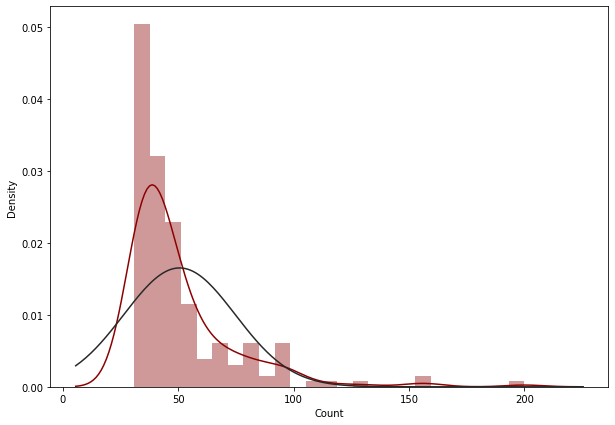

In [13]:
plt.figure(figsize=(10, 7))
sns.distplot(data.Count, kde=True, fit=norm, color='darkred')

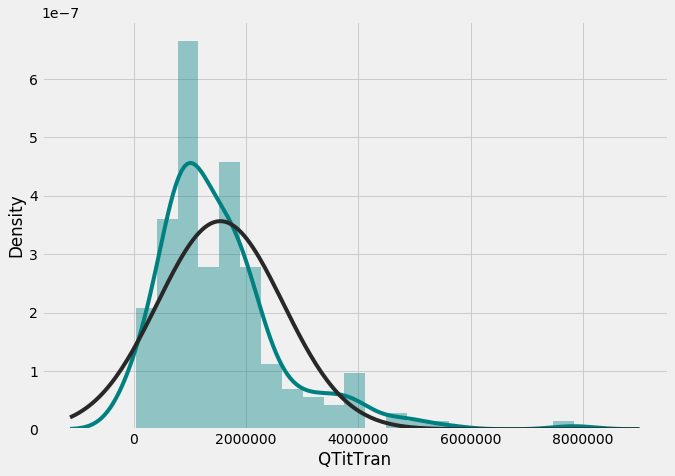

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
sns.distplot(data.QTitTran, kde=True, fit=norm, color='teal')

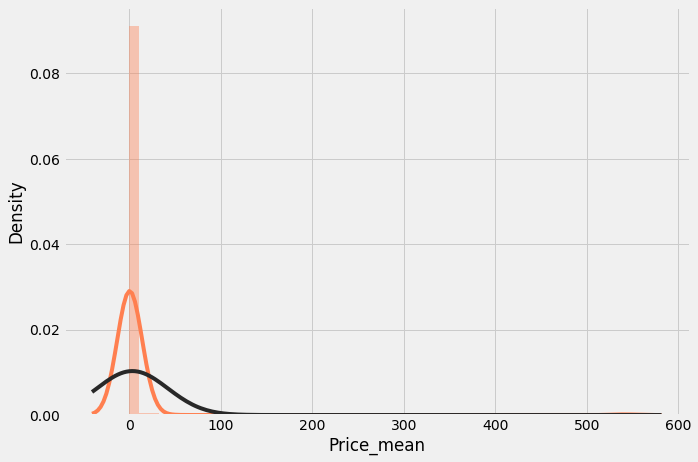

In [15]:
plt.figure(figsize=(10, 7))
sns.distplot(data.Price_mean, kde=True, fit=norm, color='coral')

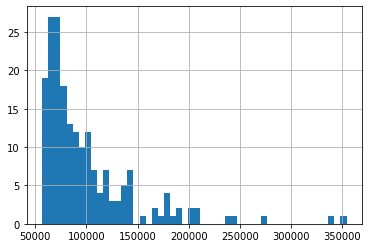

In [17]:
data.PTran_Sum.hist(bins=50)

In [18]:
data = data[data.QTitTran > 4000000]

In [19]:
import sys
print(sys.version)
import bokeh
print(bokeh.__version__)

from bokeh.io import output_notebook, show, save
output_notebook()

import networkx as nx, networkx
G=nx.from_pandas_edgelist(data, 'seller', 'buyer', 'QTitTran' )



3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
2.3.0


Loading BokehJS ...

print(nx.clustering(G, 0))

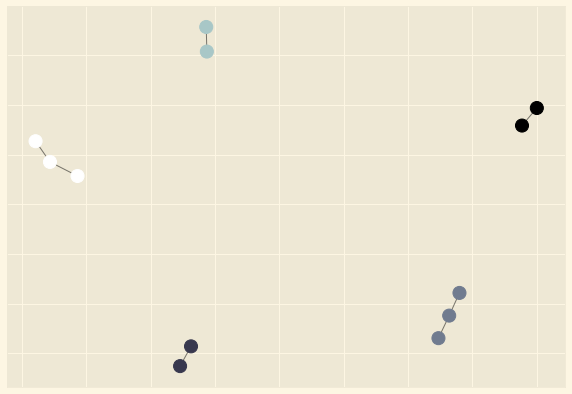

In [21]:
import community as community_louvain
import matplotlib.cm as cm

plt.style.use('Solarize_Light2')
plt.figure(figsize=(10, 7))
partition = community_louvain.best_partition(G); pos = nx.spring_layout(G)
cmap = cm.get_cmap('bone', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=170,
                       cmap=cmap, node_color=list(partition.values())); nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

In [43]:
plt.style.available

['seaborn-pastel',
 'seaborn-bright',
 'Solarize_Light2',
 'bmh',
 'seaborn-talk',
 'seaborn',
 'seaborn-colorblind',
 'seaborn-deep',
 'classic',
 'seaborn-paper',
 'seaborn-notebook',
 'grayscale',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'fast',
 'seaborn-ticks',
 'seaborn-dark',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-muted',
 'ggplot',
 'seaborn-poster',
 '_classic_test',
 'seaborn-whitegrid',
 'seaborn-dark-palette']

In [24]:
data.sort_values(by='QTitTran', ascending=False)

,buyer,seller,QTitTran,Count,PTran_Sum,Price_mean
335013,1440287,1692890,7835793,154,337876.0,0.183034
261215,520981,2157866,5542741,56,100296.0,0.018338
671946,2379648,348304,4879232,98,201880.0,0.063256
372180,1548231,1440310,4823936,98,193060.0,0.043159
335237,1440310,1547262,4733170,95,175085.0,10.500160
335677,1440322,1692890,4119731,82,179908.0,0.067529
52087,87239,383906,4002689,81,176904.0,0.214299


In [25]:
data.sort_values(by='Price_mean', ascending=False)

,buyer,seller,QTitTran,Count,PTran_Sum,Price_mean
335237,1440310,1547262,4733170,95,175085.0,10.500160
52087,87239,383906,4002689,81,176904.0,0.214299
335013,1440287,1692890,7835793,154,337876.0,0.183034
335677,1440322,1692890,4119731,82,179908.0,0.067529
671946,2379648,348304,4879232,98,201880.0,0.063256
372180,1548231,1440310,4823936,98,193060.0,0.043159
261215,520981,2157866,5542741,56,100296.0,0.018338


## **Demistify pattern**

In [2]:
data = pd.read_pickle('3mI_Clique_01.pkl')
data.shape

(17123791, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17123791 entries, 13 to 72929655
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InstrumentID    object        
 1   NTranSeaBs      int32         
 2   QTitTran        int32         
 3   PTran           float32       
 4   buyer_trader    int64         
 5   buyer           int64         
 6   Buy_PLimSaiOm   float32       
 7   seller_trader   int64         
 8   seller          int64         
 9   sell_PLimSaiOm  float32       
 10  datetime        datetime64[ns]
 11  Price           float64       
dtypes: datetime64[ns](1), float32(3), float64(1), int32(2), int64(4), object(1)
memory usage: 1.3+ GB


In [4]:
data = data[data.InstrumentID=='IRO3ZOBZ0001']
data.shape

(836223, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836223 entries, 45 to 72929543
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InstrumentID    836223 non-null  object        
 1   NTranSeaBs      836223 non-null  int32         
 2   QTitTran        836223 non-null  int32         
 3   PTran           836223 non-null  float32       
 4   buyer_trader    836223 non-null  int64         
 5   buyer           836223 non-null  int64         
 6   Buy_PLimSaiOm   836223 non-null  float32       
 7   seller_trader   836223 non-null  int64         
 8   seller          836223 non-null  int64         
 9   sell_PLimSaiOm  836223 non-null  float32       
 10  datetime        836223 non-null  datetime64[ns]
 11  Price           836223 non-null  float64       
dtypes: datetime64[ns](1), float32(3), float64(1), int32(2), int64(4), object(1)
memory usage: 67.0+ MB


In [ ]:
data[(data.buyer== 1440310 )& (data.seller== 1547262)].head(50)

In [ ]:
data[(data.buyer== 1440310 )& (data.seller== 1547262)]['datetime'].describe()